In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [55]:
file_path = r'C:\Users\dixit\Downloads\Customer Churn.csv'

df = pd.read_csv(file_path)

In [57]:
df.head(10)

,ID,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Age Group,Plan,Status,Age,Customer Value,Churn
0,1,3,no,10,2,1603,25,32,11,3,pre-paid,active,30,193.120,no
1,2,8,no,37,0,4255,65,0,13,2,pre-paid,active,25,194.400,yes
2,3,0,no,38,0,0,0,0,0,2,pre-paid,not-active,25,0.000,yes
3,4,10,no,36,0,2338,54,327,20,2,pre-paid,active,25,1579.140,yes
4,5,10,no,37,0,4083,60,0,31,1,pre-paid,active,15,227.865,yes
5,6,3,no,37,0,2278,52,0,29,1,pre-paid,active,15,128.150,yes
6,7,11,no,37,0,3660,76,0,24,2,pre-paid,active,25,168.120,yes
7,8,4,no,37,0,2245,33,253,14,3,pre-paid,active,30,1103.120,yes
8,9,13,no,36,1,9000,115,112,39,3,pre-paid,active,30,812.600,yes
9,10,7,no,37,0,13658,163,0,40,3,pre-paid,active,30,552.840,yes


In [59]:
print(df.columns)


Index(['ID', 'Call Failure', 'Complains', 'Subscription  Length',
       'Charge Amount', 'Seconds of Use', 'Freq. of use', 'Freq. of SMS',
       'Distinct Called Numbers', 'Age Group', 'Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')


In [61]:
data = df.drop(['ID', 'Call Failure','Age Group', 'Plan', 'Status', 'Age',], axis=1 ,errors ='ignore')
data.head()  # Check the cleaned dataset


,Complains,Subscription Length,Charge Amount,Seconds of Use,Freq. of use,Freq. of SMS,Distinct Called Numbers,Customer Value,Churn
0,no,10,2,1603,25,32,11,193.120,no
1,no,37,0,4255,65,0,13,194.400,yes
2,no,38,0,0,0,0,0,0.000,yes
3,no,36,0,2338,54,327,20,1579.140,yes
4,no,37,0,4083,60,0,31,227.865,yes


In [63]:

data.duplicated().sum()  
data.isnull().sum()      


Complains                  0
Subscription  Length       0
Charge Amount              0
Seconds of Use             0
Freq. of use               0
Freq. of SMS               0
Distinct Called Numbers    0
Customer Value             0
Churn                      0
dtype: int64

In [65]:
data.shape  


(3150, 9)

In [67]:
print(data.columns)


Index(['Complains', 'Subscription  Length', 'Charge Amount', 'Seconds of Use',
       'Freq. of use', 'Freq. of SMS', 'Distinct Called Numbers',
       'Customer Value', 'Churn'],
      dtype='object')


In [69]:

threshold_balance = data["Charge Amount"].mean()
threshold_active = data["Customer Value"].mean()


def create_purchase_label(row):
    if row['Customer Value'] > threshold_active and row['Charge Amount'] > threshold_balance:
        return 1
    else:
        return 0
     
data['PurchaseLabel'] = data.apply(create_purchase_label, axis=1)
     
print(data[['Charge Amount', 'Customer Value', 'PurchaseLabel']])


      Charge Amount  Customer Value  PurchaseLabel
0                 2         193.120              0
1                 0         194.400              0
2                 0           0.000              0
3                 0        1579.140              0
4                 0         227.865              0
...             ...             ...            ...
3145              0         108.855              0
3146              0         711.205              0
3147              0         357.525              0
3148              2         155.800              0
3149              0         953.120              0

[3150 rows x 3 columns]


In [71]:
y = data['PurchaseLabel']
X = data.drop(['PurchaseLabel'], axis=1)


X.head()
y.head()


0    0
1    0
2    0
3    0
4    0
Name: PurchaseLabel, dtype: int64

In [73]:
le = LabelEncoder()

In [75]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [77]:
print(data.dtypes)


Complains                   object
Subscription  Length         int64
Charge Amount                int64
Seconds of Use               int64
Freq. of use                 int64
Freq. of SMS                 int64
Distinct Called Numbers      int64
Customer Value             float64
Churn                       object
PurchaseLabel                int64
dtype: object


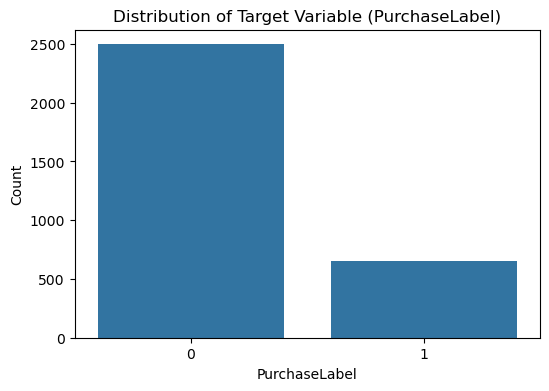

In [79]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title("Distribution of Target Variable (PurchaseLabel)")
plt.xlabel("PurchaseLabel")
plt.ylabel("Count")
plt.show()

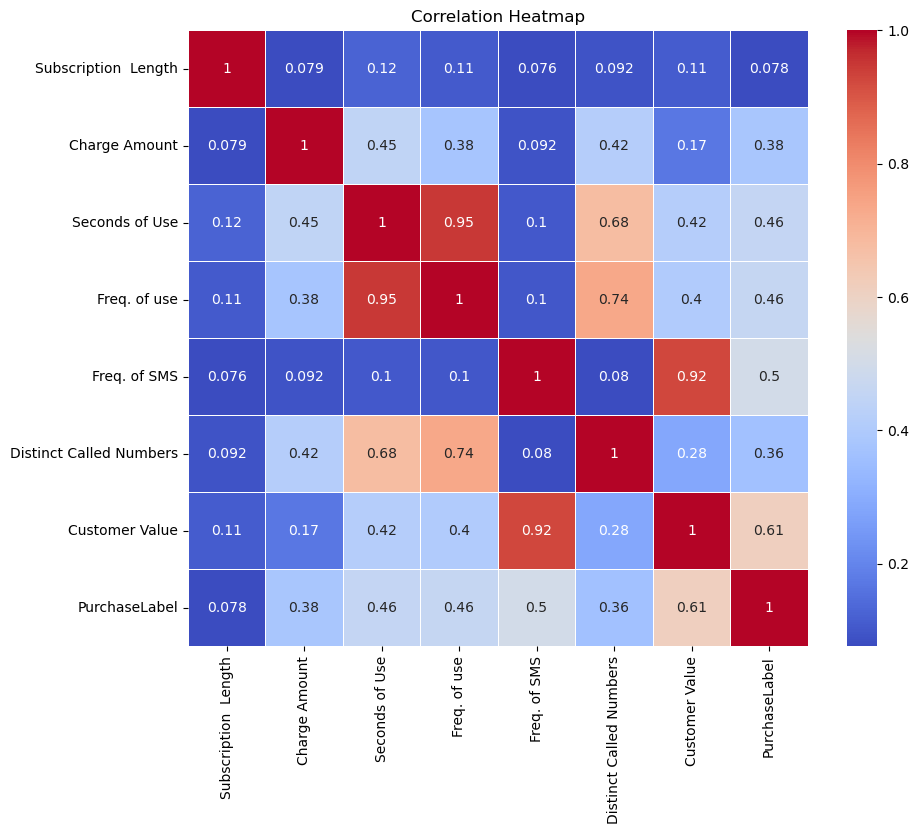

In [89]:
plt.figure(figsize=(10, 8))
corr_matrix = data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


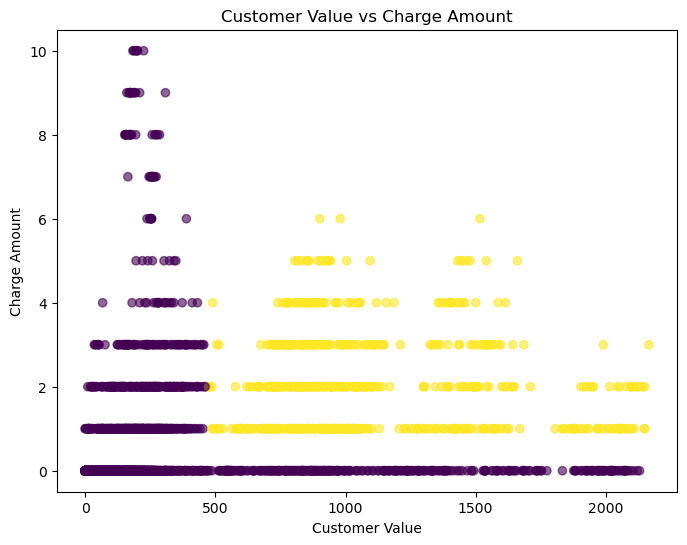

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(data['Customer Value'], data['Charge Amount'], alpha=0.6, c=y)
plt.title("Customer Value vs Charge Amount")
plt.xlabel("Customer Value")
plt.ylabel("Charge Amount")
plt.show()


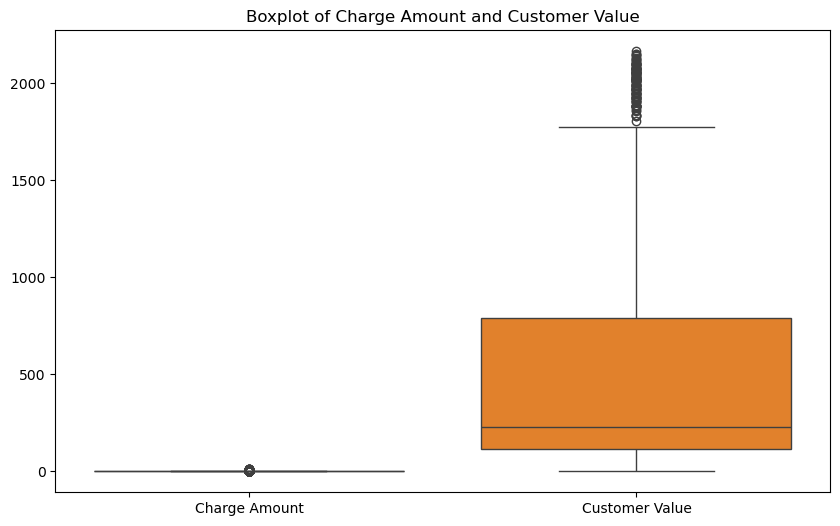

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['Charge Amount', 'Customer Value']])
plt.title("Boxplot of Charge Amount and Customer Value")
plt.show()
